<a href="https://colab.research.google.com/github/clashleyuncc/Intro-To-ML/blob/main/HW1P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The cost for given values of theta_0 and theta_1 = 5.524438459196242
Final value of theta = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]
Prediction for (1,1,1) = 2.9413640816645295
Prediction for (2,0,4) = 0.09179843075891586
Prediction for (3,2,1) = -0.012755552822328889


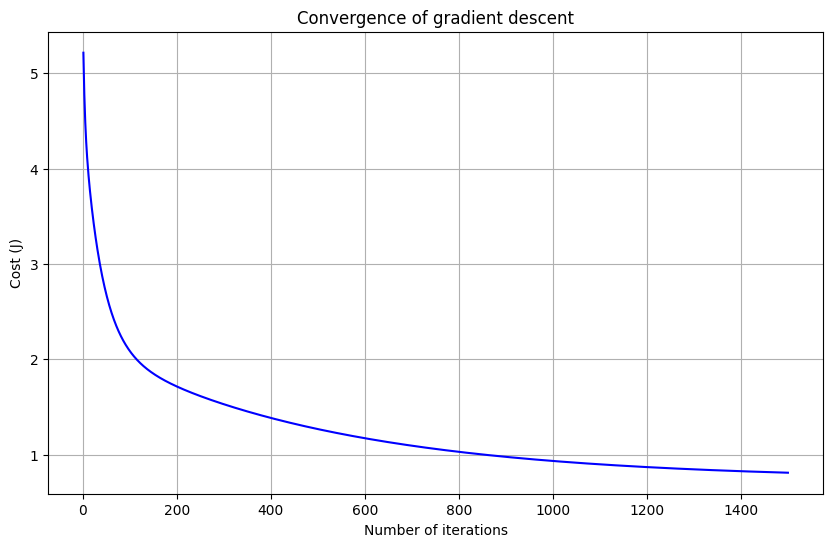

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/4th Year Charlotte/IntroToML/D3.csv'

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(Y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, Y, theta)
    return theta, cost_history

def predict(x1, x2, x3, theta):
    inputs = np.array([1, x1, x2, x3])
    y = inputs.dot(theta)
    return y

df = pd.read_csv(file_path)

X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
Y = df.values[:, 3]

m = len(Y)

X_0 = np.ones((m, 1))
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)

X = np.hstack((X_0, X_1, X_2, X_3))
theta = np.zeros(4)

cost = compute_cost(X, Y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

iterations = 1500
alpha = 0.01

theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

# Predictions:

pred1 = predict(1, 1, 1, theta)
print('Prediction for (1,1,1) =', pred1)

pred2 = predict(2, 0, 4, theta)
print('Prediction for (2,0,4) =', pred2)

pred3 = predict(3, 2, 1, theta)
print('Prediction for (3,2,1) =', pred3)

# Plot Cost function
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()
